In [29]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.signal import find_peaks
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from FeatureStatCalulateFile import FeatureStat
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [30]:
# Preview of the Data: 
# Reading the data into a pandas data frame with defined column names and dropping null values will allow us to achive the processing above
# Define column names
column_names = ['user', 'activity', 'timestamp', 'x-axis', 'y-axis', 'z-axis']
# Read the file, skipping bad lines
data = pd.read_csv('data/WISDM_ar_v1.1_raw.txt', sep=',', names=column_names, on_bad_lines='skip')
# drop null values: 
data = data.dropna()

data['z-axis'] = data['z-axis'].str.rstrip(';').astype(float)

In [31]:
# create window sizes: 

def get_windows(df, window_size, step_size):

    x_list = []
    y_list = []
    z_list = []
    activity_list = []
    for i in range(0, df.shape[0] - window_size, step_size):
        xs = df['x-axis'].values[i : i + window_size]
        ys = df['y-axis'].values[i : i + window_size]
        zs = df['z-axis'].values[i : i + window_size]
        label = df['activity'][i : i + window_size].mode()[0]

        x_list.append(xs)
        y_list.append(ys)
        z_list.append(zs)
        activity_list.append(label)
    return x_list, y_list, z_list, activity_list
        

In [32]:
df_8 = data[data['user'] == 8]

In [33]:
df_8['activity'].value_counts()

activity
Walking       17108
Jogging       10313
Upstairs       4453
Downstairs     3346
Standing       3269
Sitting        2699
Name: count, dtype: int64

In [35]:
Walking = df_8[df_8['activity'] == 'Walking'].head(2699)
Jogging = df_8[df_8['activity'] == 'Jogging'].head(2699)
Upstairs = df_8[df_8['activity'] == 'Upstairs'].head(2699)
Downstairs = df_8[df_8['activity'] == 'Downstairs'].head(2699)
Sitting = df_8[df_8['activity'] == 'Sitting'].head(2699)
Standing = df_8[df_8['activity'] == 'Standing'].head(2699)

In [36]:
data_bal = pd.DataFrame
data_bal = pd.concat([Walking, Jogging, Upstairs, Downstairs, Sitting, Standing])

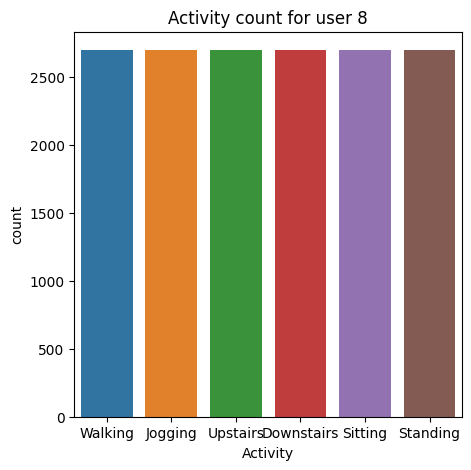

In [37]:
plt.figure(figsize=(5,5))
sns.countplot(x='activity', data=data_bal, hue='activity')
plt.xlabel('Activity')
plt.title('Activity count for user 8')
plt.show()

In [38]:
X = pd.DataFrame()

In [ ]:
x_list, y_list, z_list, activity_list = get_windows(data_bal, 100, 50)

In [40]:
featured_data = FeatureStat(X, x_list, y_list, z_list)

In [41]:
X = featured_data.all()

In [42]:
from sklearn.model_selection import train_test_split

In [47]:
y = pd.Series(activity_list)  # Corresponding labels

# Step 3: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, stratify=y
)

# Verify the splits
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Train set shape: (23, 59) (23,)
Test set shape: (10, 59) (10,)


In [48]:
scaler = StandardScaler()
X_train  = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [50]:
decisionTree = DecisionTreeClassifier(random_state=42)
decisionTree.fit(X_train, y_train)
dT_yPred = decisionTree.predict(X_test)
dT_accuracy = accuracy_score(y_test, dT_yPred)
print(f'Accuracy of Decision Tree on user 8 balanced dataset is {dT_accuracy*100:.2f}')
print("\n------------------ Decision Tree Classification Report - user 8 : Balanced  -------------------\n")
print(classification_report(y_test, dT_yPred))

Accuracy of Decision Tree on user 8 balanced dataset is 80.00

------------------ Decision Tree Classification Report - user 8 : Balanced  -------------------

              precision    recall  f1-score   support

  Downstairs       1.00      1.00      1.00         1
     Jogging       1.00      1.00      1.00         2
     Sitting       0.33      1.00      0.50         1
    Standing       0.00      0.00      0.00         2
    Upstairs       1.00      1.00      1.00         2
     Walking       1.00      1.00      1.00         2

    accuracy                           0.80        10
   macro avg       0.72      0.83      0.75        10
weighted avg       0.73      0.80      0.75        10



/opt/anaconda3/envs/ml-project-tf_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/ml-project-tf_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/ml-project-tf_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

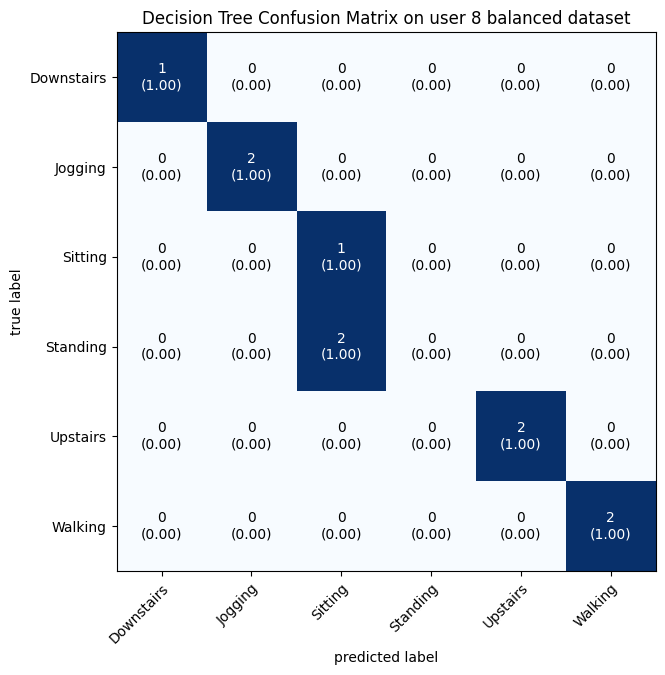

In [51]:
dT_cm = confusion_matrix(y_test, dT_yPred)
plot_confusion_matrix(dT_cm, class_names=decisionTree.classes_, show_normed=True, figsize=(7,7))
plt.title("Decision Tree Confusion Matrix on user 8 balanced dataset")
plt.show()

In [52]:
randomForest = RandomForestClassifier(random_state=42)
randomForest.fit(X_train, y_train)
rF_yPred = randomForest.predict(X_test)
rF_accuracy = accuracy_score(y_true=y_test, y_pred=rF_yPred)
print(f'Accuracy of Random Forest on user 8 balanced is {rF_accuracy*100:.2f}')
print("\n------------------ Random Forest Classification Report - user 8 balanced data -------------------\n")
print(classification_report(y_test, rF_yPred))


Accuracy of Random Forest on user 8 balanced is 100.00

------------------ Random Forest Classification Report - user 8 balanced data -------------------

              precision    recall  f1-score   support

  Downstairs       1.00      1.00      1.00         1
     Jogging       1.00      1.00      1.00         2
     Sitting       1.00      1.00      1.00         1
    Standing       1.00      1.00      1.00         2
    Upstairs       1.00      1.00      1.00         2
     Walking       1.00      1.00      1.00         2

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



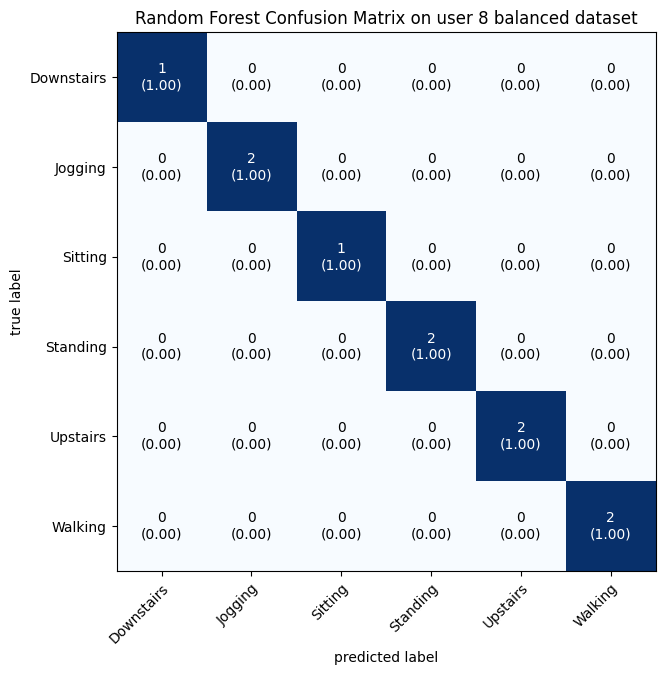

In [53]:
rF_cm = confusion_matrix(y_test, rF_yPred)
plot_confusion_matrix(rF_cm, class_names=decisionTree.classes_, show_normed=True, figsize=(7,7))
plt.title("Random Forest Confusion Matrix on user 8 balanced dataset")
plt.show()